#### Preprocessing and EDA:
* Handling Missing Data
* Swarm Plot, Violin Plot for:
    - OverallQual vs SalePrice with variations based on OverallCond
    - Neighborhood vs SalePrice with variations based on MSZoning
    - Neighborhood vs SalePrice with variations based on MSSubClass
    - Neighborhood vs SalePrice with variations based on HouseStyle
    - Neighborhood vs SalePrice with variations based on Foundation
    - ExterQual vs SalePrice with variations based on ExterCond
    - BasementQual vs SalePrice with variations based on BsmtCond
* Regression Plot for:
    - GrLivArea vs Sale Price
    - LotArea vs SalePrice
* Label Encoding Categorical Ordinal Data
* One-Hot Encoding Categorical Nominal Data
* Visualizing Feature Correlations

## Regression Techniques in this Version:
* Bagging Regressor
* Random Subspaces Model
* Random Pathces Model
* Random Forest Regression
* Extra Trees
* Gradient Boosted Regressor
* Gradient Boosted Regressor with GridSearch for hyperparameter tuning
* Stacking Random Forest, Extra Trees and Gradient Boosted Regressors
* XGBoost Regressor

Submission based on XGBoost with tiny percent of Extra Trees, Gradient Boosted Regressor and Random Forest Regressor

### Regression Techniques in Version 1:
* Kitchen-Sink Regression
* Selecting K-Best features
    - Using Mutual Info Regression Method
    - Using RFE - Recursive Feature Elimination
    - Using Sequential Feature Selector
* Gradient Boosted Regressor

Submissions were based on Gradient Boosted Regressor alone

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read the training and testing data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
348,349,160,RL,36.0,2448,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,154000
271,272,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,241500
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
1195,1196,60,RL,51.0,8029,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,176000
116,117,20,RL,NaN,11616,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,139000


In [4]:
# general information about the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Check for Missing Value

In [5]:
# check for missing data in training data
train_data.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [6]:
# percentage of missing values per column
(train_data.isna().sum() / train_data.shape[0]).sort_values(ascending=False)[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

PoolQC,MiscFeature,Alley,Fence,FireplaceQu all have more than 40% missing data so drop these

In [7]:
# removing unwanted columns
train_data = train_data.drop(['PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
test_data = test_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

# Handling Missing Values

In [8]:
missing_data_col = ['LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical']
train_data[missing_data_col].dtypes

LotFrontage     float64
GarageCond       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
BsmtExposure     object
BsmtFinType2     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

#### Using Imputer instead of fillna

In [9]:
# instead of fillna using Imputer
# replacing float data with mean and string with mode of corresponding columns
from sklearn.impute import SimpleImputer
float_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

train_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']] = float_imputer.fit_transform(train_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']])

In [10]:
string_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
temp_var = ['GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']
train_data[temp_var] = string_imputer.fit_transform(train_data[temp_var])

In [11]:
# no null data now
train_data.isnull().sum().sort_values(ascending=False)[:5]

SalePrice      0
ExterCond      0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64

In [12]:
# missing values in test data
test_data.isnull().sum().sort_values(ascending=False)[:30]

LotFrontage     227
GarageCond       78
GarageQual       78
GarageYrBlt      78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
Utilities         2
Functional        2
BsmtFullBath      2
BsmtUnfSF         1
SaleType          1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
TotalBsmtSF       1
GarageCars        1
KitchenQual       1
GarageArea        1
HouseStyle        0
MSSubClass        0
dtype: int64

In [13]:
test_missing = ['LotFrontage','GarageCond','GarageQual','GarageYrBlt','GarageFinish','GarageType','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','MasVnrArea','MSZoning','BsmtHalfBath','Utilities','Functional','BsmtFullBath','BsmtUnfSF','SaleType','BsmtFinSF2','BsmtFinSF1','Exterior2nd','Exterior1st','TotalBsmtSF','GarageCars','KitchenQual','GarageArea']

In [14]:
# training data and testing data columns having NaN values differ 
missing_data_col == test_missing

False

In [15]:
test_data[test_missing].dtypes.sort_values()

LotFrontage     float64
GarageCars      float64
TotalBsmtSF     float64
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
BsmtFullBath    float64
BsmtHalfBath    float64
MasVnrArea      float64
GarageArea      float64
GarageYrBlt     float64
BsmtFinType2     object
GarageCond       object
GarageQual       object
Exterior1st      object
Exterior2nd      object
GarageFinish     object
SaleType         object
GarageType       object
BsmtCond         object
Functional       object
Utilities        object
BsmtQual         object
KitchenQual      object
BsmtExposure     object
MasVnrType       object
BsmtFinType1     object
MSZoning         object
dtype: object

In [16]:
# filling nan values for float dtype features
float_missing = ['LotFrontage','GarageCars','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','MasVnrArea','GarageArea','GarageYrBlt']
test_float_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
test_data[float_missing] = test_float_imputer.fit_transform(test_data[float_missing])

In [17]:
# filling nan values for str dtype features
str_missing = ['BsmtFinType2','GarageCond','GarageQual','Exterior1st','Exterior2nd','GarageFinish','SaleType','GarageType','BsmtCond','Functional','Utilities','BsmtQual','KitchenQual','BsmtExposure','MasVnrType','BsmtFinType1','MSZoning']
test_str_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_data[str_missing] = test_str_imputer.fit_transform(test_data[str_missing])

In [18]:
test_data.isnull().sum().sort_values(ascending=False)[:5]

SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64

### Some Plots to Visualize the effects of features on driving the Sale Price

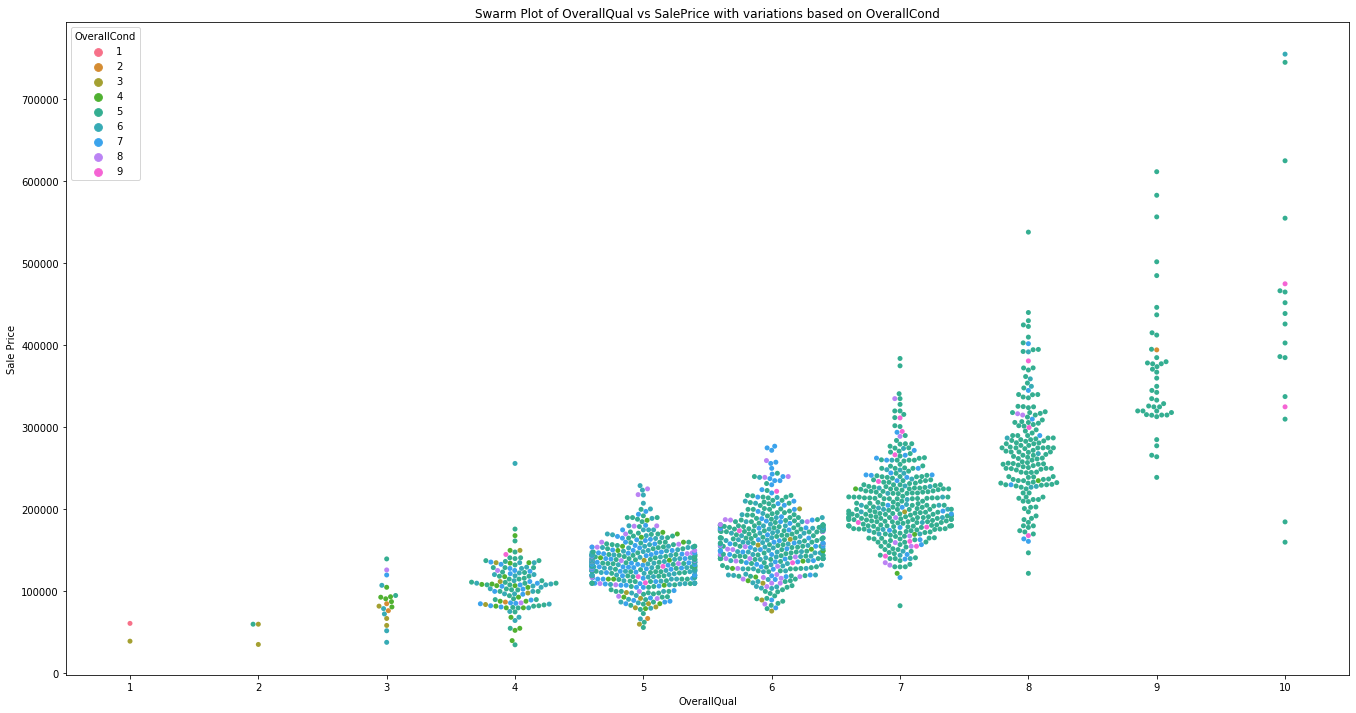

In [19]:
# Swarm Plot of OverallQual vs SalePrice with variations based on OverallCond
plt.figure(figsize=(23,12))
sns.swarmplot(train_data['OverallQual'], train_data['SalePrice'], hue=train_data['OverallCond'], palette='husl')
plt.title("Swarm Plot of OverallQual vs SalePrice with variations based on OverallCond")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price")
plt.show()

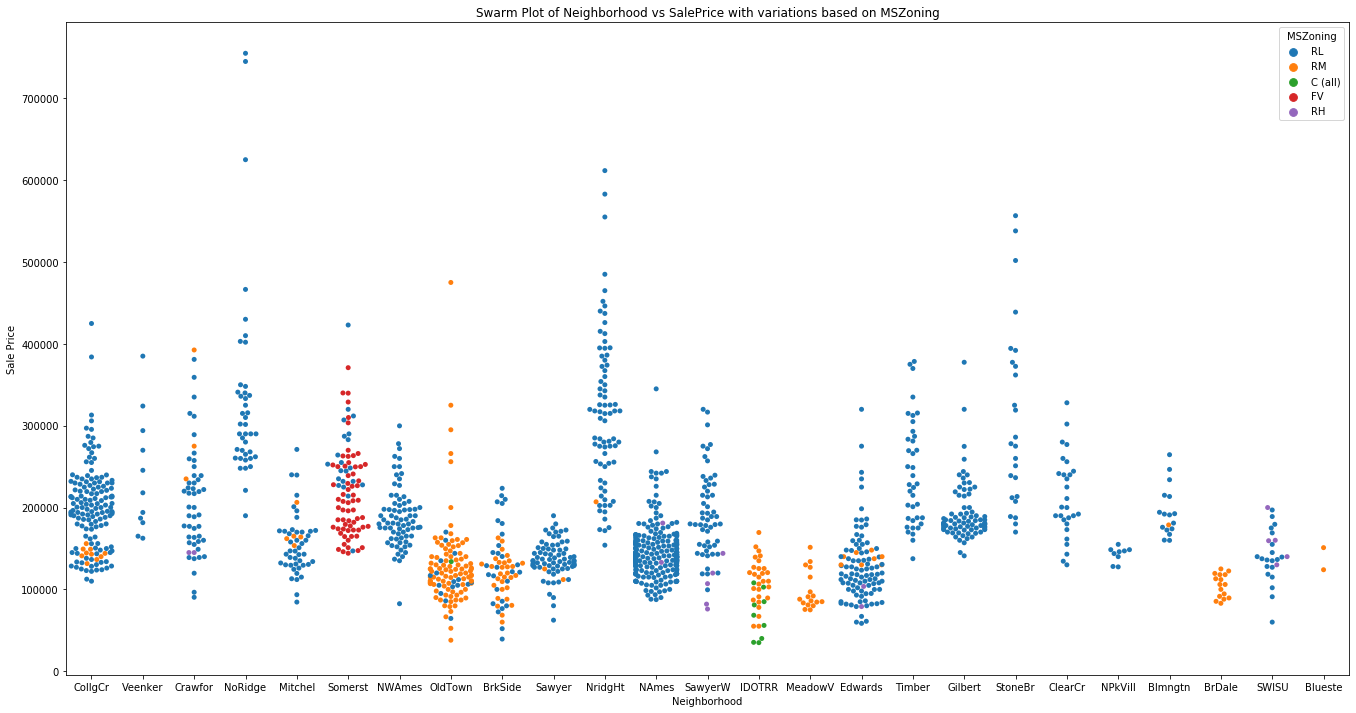

In [20]:
# Swarm Plot of Neighborhood vs SalePrice with variations based on MSZoning
plt.figure(figsize=(23,12))
sns.swarmplot(train_data['Neighborhood'], train_data['SalePrice'], hue=train_data['MSZoning'])
plt.title("Swarm Plot of Neighborhood vs SalePrice with variations based on MSZoning")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()

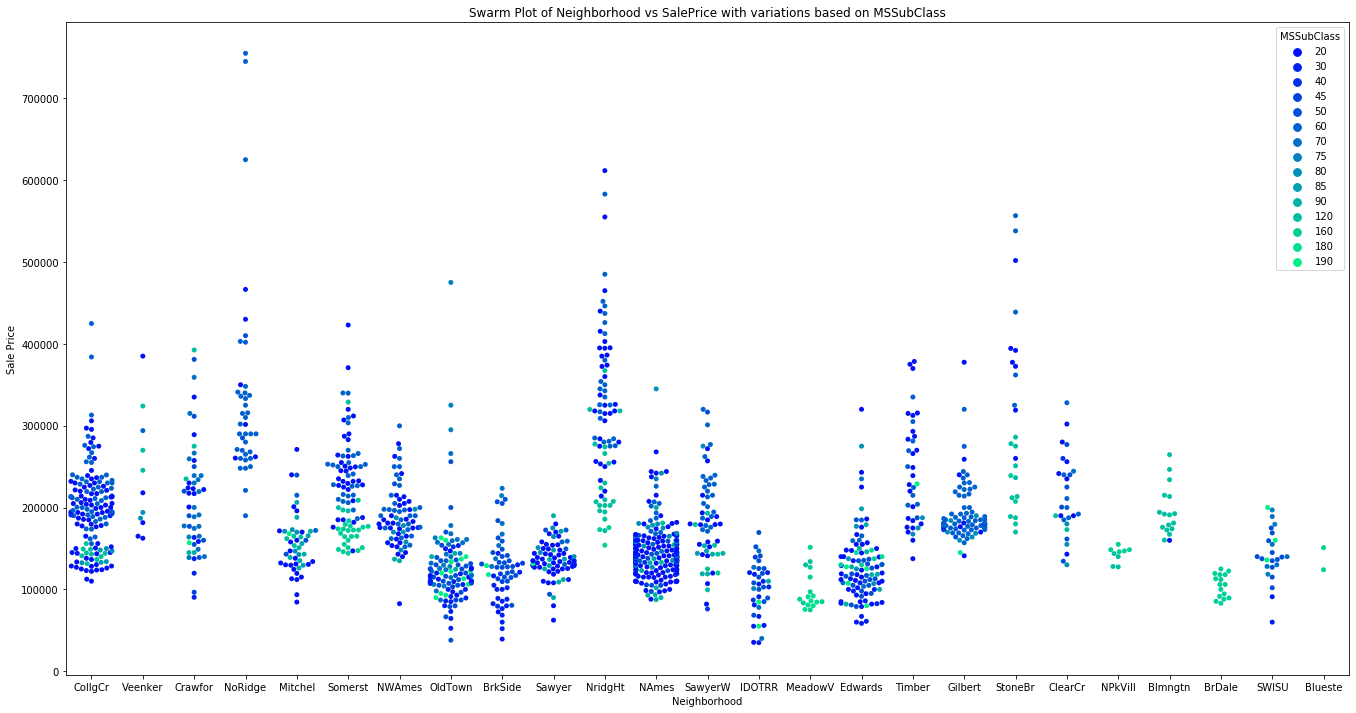

In [21]:
# Swarm Plot of Neighborhood vs SalePrice with variations based on MSSubClass
plt.figure(figsize=(23,12))
sns.swarmplot(train_data['Neighborhood'], train_data['SalePrice'], hue=train_data['MSSubClass'], palette='winter')
plt.title("Swarm Plot of Neighborhood vs SalePrice with variations based on MSSubClass")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()

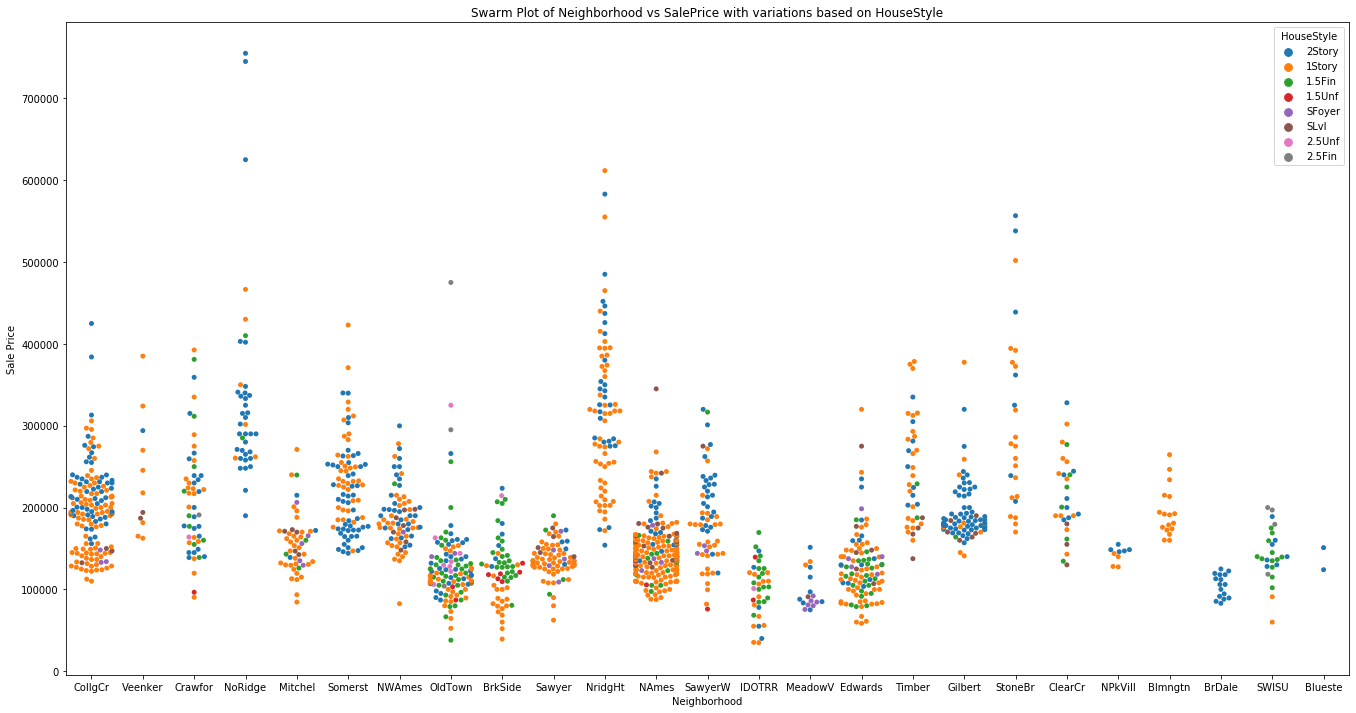

In [22]:
# Swarm Plot of Neighborhood vs SalePrice with variations based on HouseStyle
plt.figure(figsize=(23,12))
sns.swarmplot(train_data['Neighborhood'], train_data['SalePrice'], hue=train_data['HouseStyle'])
plt.title("Swarm Plot of Neighborhood vs SalePrice with variations based on HouseStyle")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()

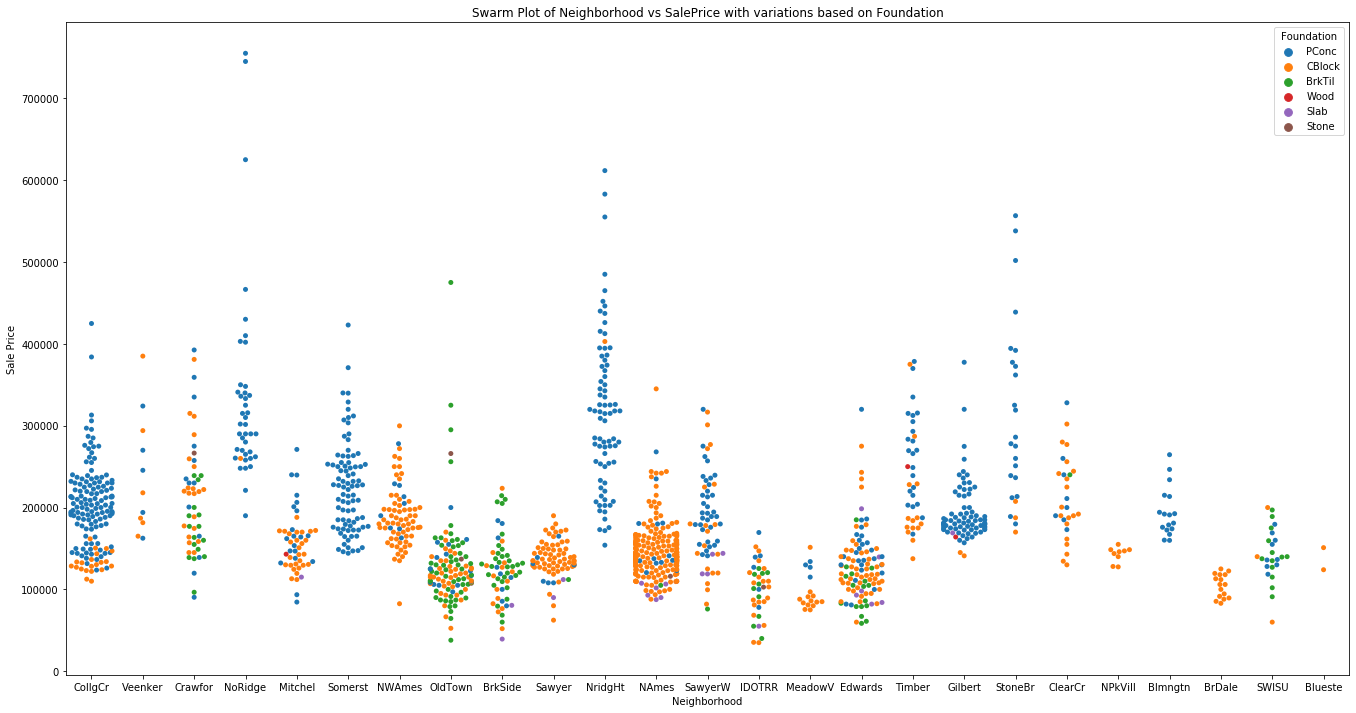

In [23]:
# Swarm Plot of Neighborhood vs SalePrice with variations based on Foundation
plt.figure(figsize=(23,12))
sns.swarmplot(train_data['Neighborhood'], train_data['SalePrice'], hue=train_data['Foundation'])
plt.title("Swarm Plot of Neighborhood vs SalePrice with variations based on Foundation")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()

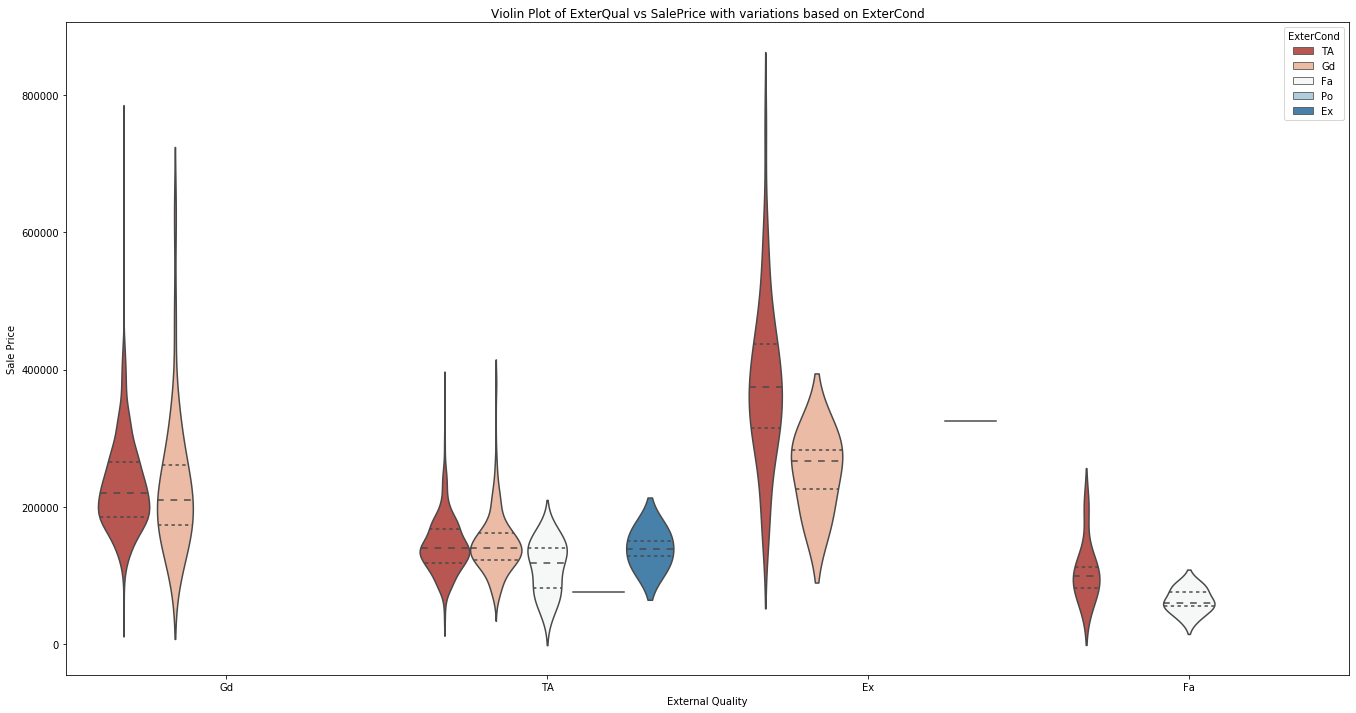

In [24]:
# Violin Plot of ExterQual vs SalePrice with variations based on ExterCond
plt.figure(figsize=(23,12))
sns.violinplot(train_data['ExterQual'], train_data['SalePrice'], hue=train_data['ExterCond'], inner='quartile', palette='RdBu')
plt.title("Violin Plot of ExterQual vs SalePrice with variations based on ExterCond")
plt.xlabel("External Quality")
plt.ylabel("Sale Price")
plt.show()

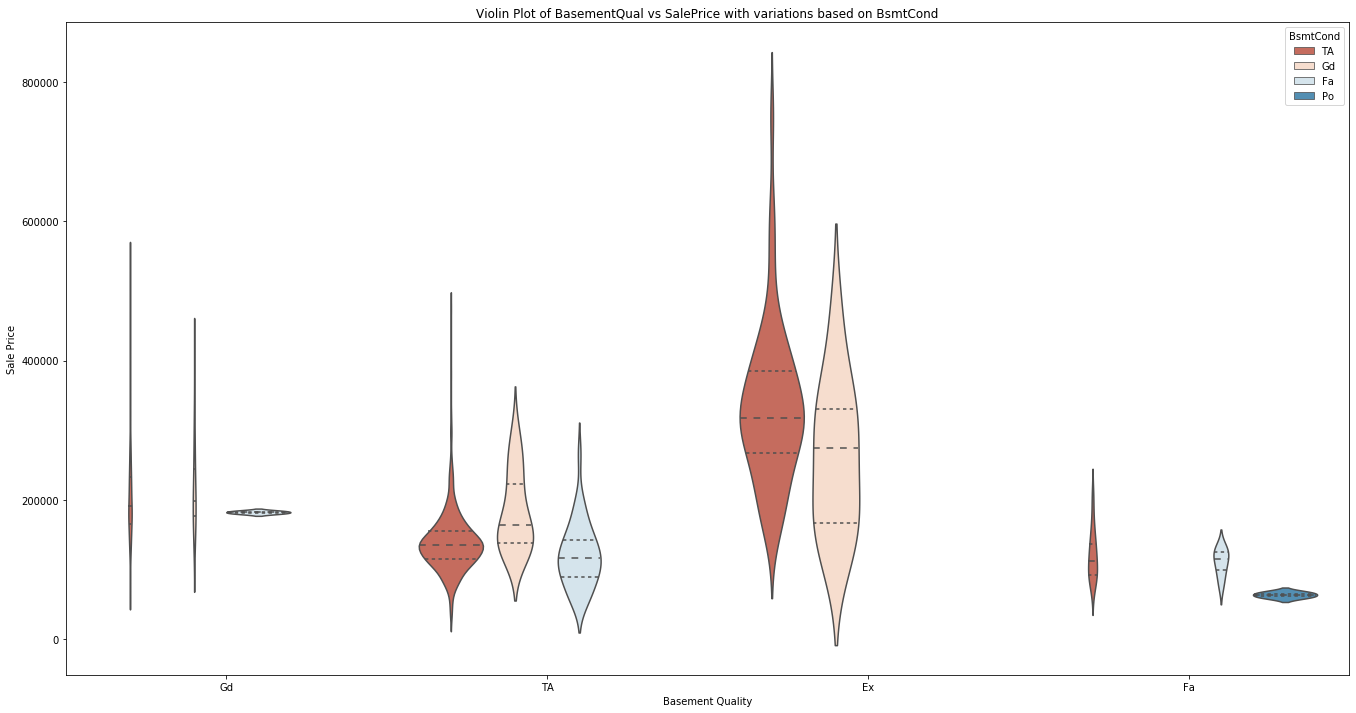

In [25]:
# Violin Plot of BasementQual vs SalePrice with variations based on BsmtCond
plt.figure(figsize=(23,12))
sns.violinplot(train_data['BsmtQual'], train_data['SalePrice'], hue=train_data['BsmtCond'], inner='quartile', palette='RdBu')
plt.title("Violin Plot of BasementQual vs SalePrice with variations based on BsmtCond")
plt.xlabel("Basement Quality")
plt.ylabel("Sale Price")
plt.show()

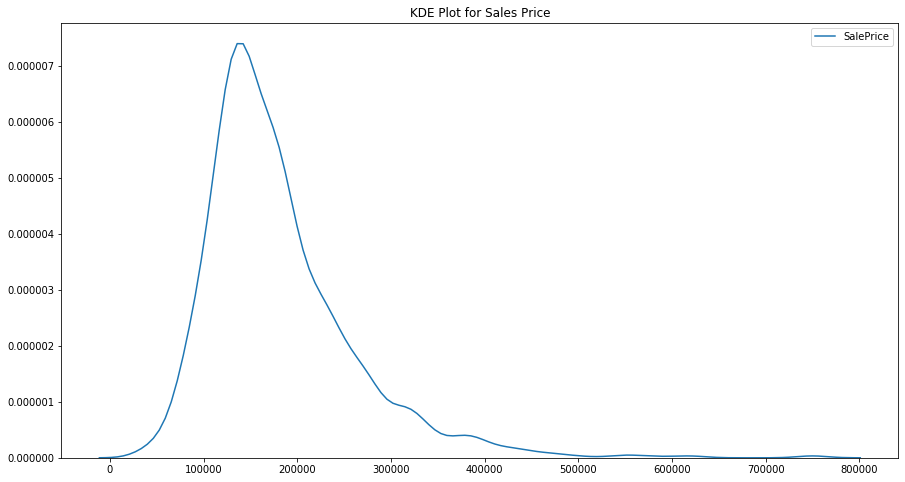

In [26]:
# KDE Plot
plt.figure(figsize=(15,8))
sns.kdeplot(train_data['SalePrice'])
plt.title('KDE Plot for Sales Price')
plt.show()

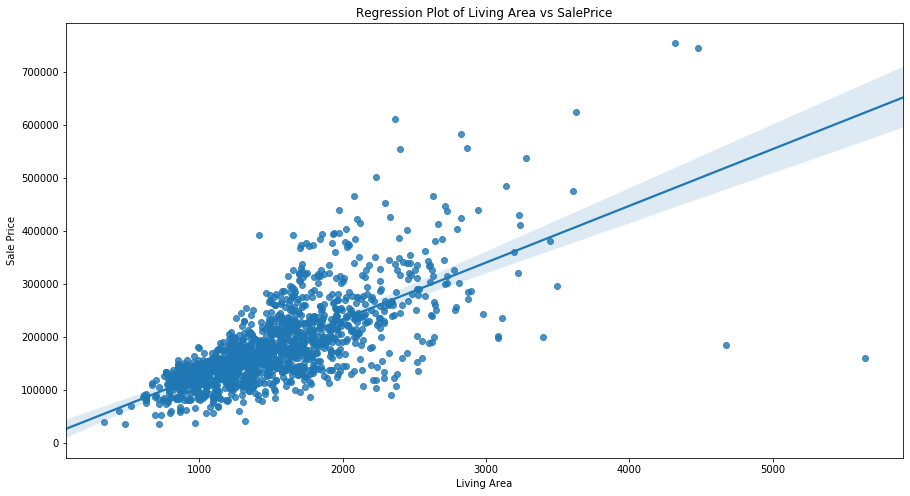

In [27]:
# Regression Plot GrLivArea vs Sale Price
plt.figure(figsize=(15,8))
sns.regplot(train_data['GrLivArea'], train_data['SalePrice'])
plt.title("Regression Plot of Living Area vs SalePrice")
plt.xlabel("Living Area")
plt.ylabel("Sale Price")
plt.show()

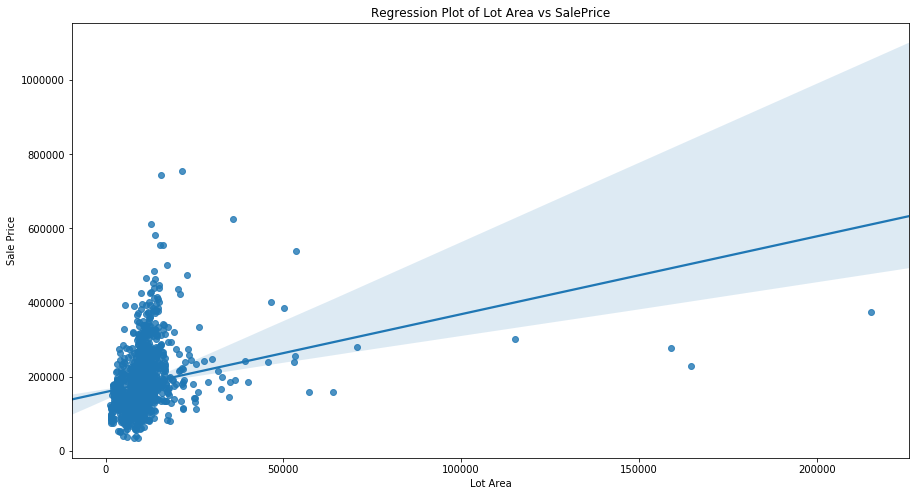

In [28]:
# Regression Plot LotArea vs SalePrice
plt.figure(figsize=(15,8))
sns.regplot(train_data['LotArea'], train_data['SalePrice'])
plt.title("Regression Plot of Lot Area vs SalePrice")
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

# Label Encoding Categorical Data
Label Encoding works best with Categorical Data which have some inherent ordering

In [29]:
from sklearn.preprocessing import LabelEncoder

# these features appear to have ordering in them
ordinal_columns = ['Street','LotShape','LandContour','Utilities','LandSlope','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond',
                   'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond',
                   'PavedDrive']
train_le = {}
for col in ordinal_columns:
    train_le[col] = LabelEncoder()
    
    train_data[col] = train_le[col].fit_transform(train_data[col])

In [30]:
test_le = {}
for col in ordinal_columns:
    test_le[col] = LabelEncoder()
    
    test_data[col] = test_le[col].fit_transform(test_data[col])

## One-Hot Encoding rest of the features

In [31]:
test_data[ordinal_columns]

,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,HouseStyle,ExterQual,ExterCond,BsmtQual,...,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive
0,1,3,3,0,0,0,2,3,4,3,...,4,3,4,1,3,6,2,3,4,2
1,1,0,3,0,0,0,2,3,4,3,...,0,5,4,1,2,6,2,3,4,2
2,1,0,3,0,0,0,4,3,4,2,...,2,5,2,1,3,6,0,3,4,2
3,1,0,3,0,0,0,4,3,4,3,...,2,5,0,1,2,6,0,3,4,2
4,1,0,1,0,0,4,2,2,4,2,...,0,5,0,1,2,6,1,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,3,3,0,0,3,4,3,4,3,...,5,5,2,1,3,6,2,3,4,2
1455,1,3,3,0,0,4,4,3,4,3,...,4,5,4,1,3,6,2,3,4,2
1456,1,3,3,0,0,0,2,3,4,3,...,0,5,0,1,3,6,2,3,4,2
1457,1,3,3,0,0,0,5,3,4,2,...,2,5,4,1,3,6,2,3,4,2


In [32]:
# need to combine both the dataframes or else encoding creates dataframes of different sizes

train_data['train'] = 1
test_data['test'] = 1

combined_df = pd.concat([train_data, test_data])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [33]:
# use Pandas get_dummies for One-hot Encoding
combined_df = pd.get_dummies(combined_df)

In [34]:
train_data = combined_df[combined_df['train'] == 1]
test_data = combined_df[combined_df['test'] == 1]
train_data = train_data.drop(['train', 'test'], axis=1)
test_data = test_data.drop(['train', 'test', 'SalePrice'], axis=1)

In [35]:
# shape is same for both the datasets
print(train_data.shape, test_data.shape)

(1460, 199) (1459, 198)


### Scaling the Data

In [36]:
from sklearn.preprocessing import RobustScaler

scale = RobustScaler()

features = train_data.drop('SalePrice', axis=1)
features = pd.DataFrame(data=scale.fit_transform(features), columns=features.columns)
target = train_data['SalePrice']

In [37]:
test_scale = RobustScaler()

test_df = pd.DataFrame(data=test_scale.fit_transform(test_data), columns=test_data.columns)

# Visualizing Feature Correlations

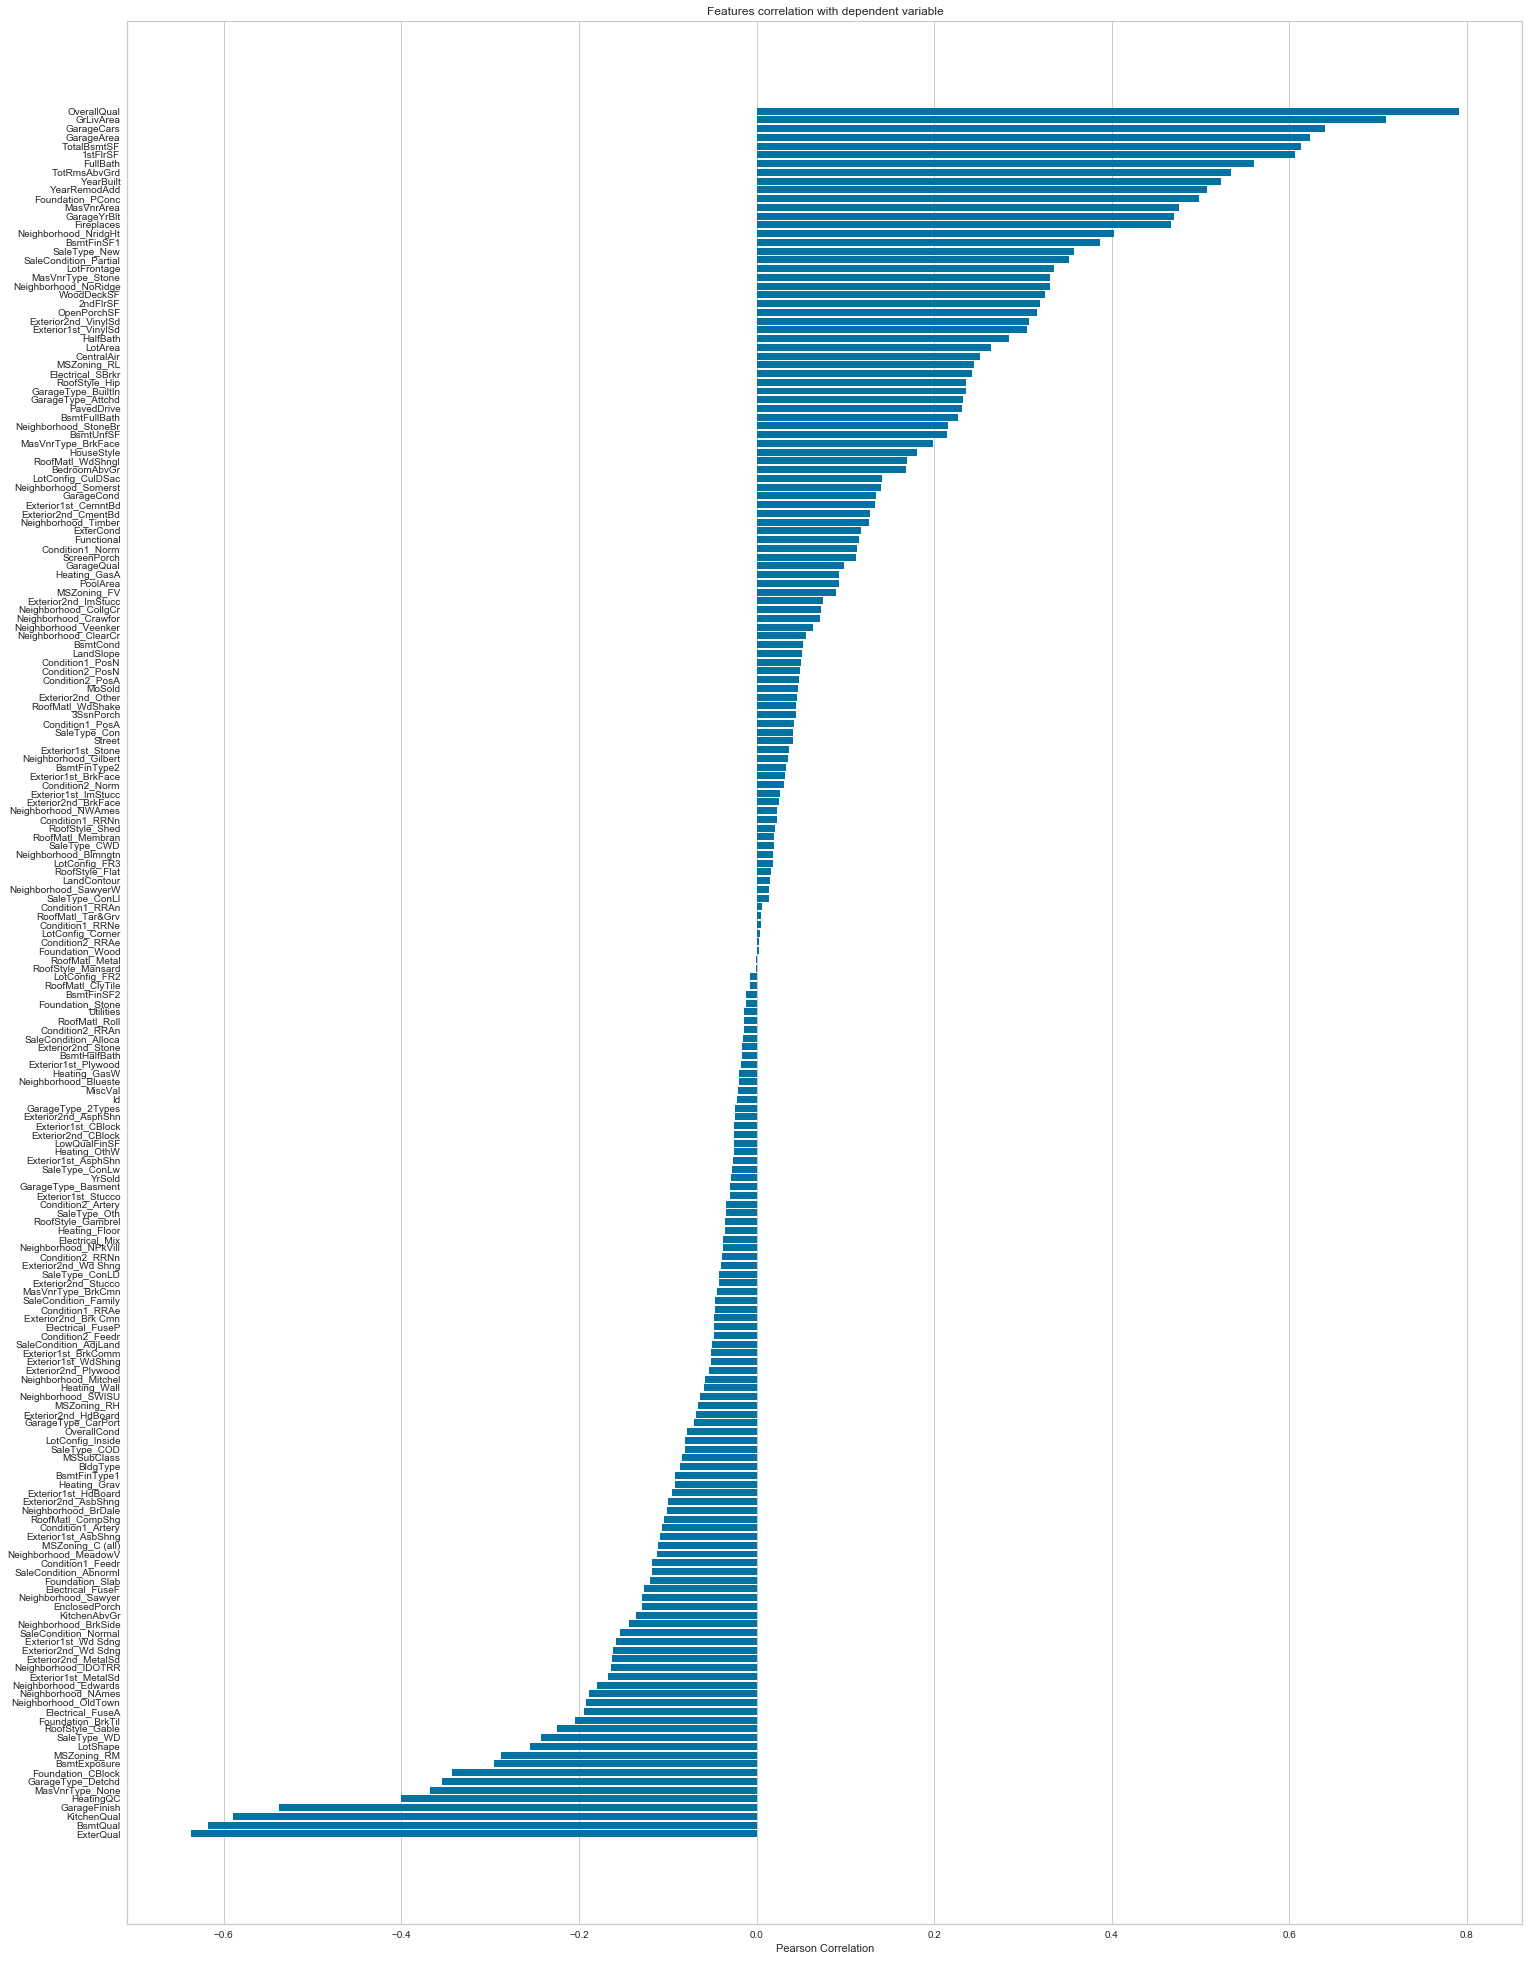

In [38]:
# Pearson Correlation
from yellowbrick.target import FeatureCorrelation
plt.figure(figsize=(25,35))
viz = FeatureCorrelation(labels = features.columns, method='pearson', sort=True)
viz.fit(features, target)
viz.poof()
plt.show()

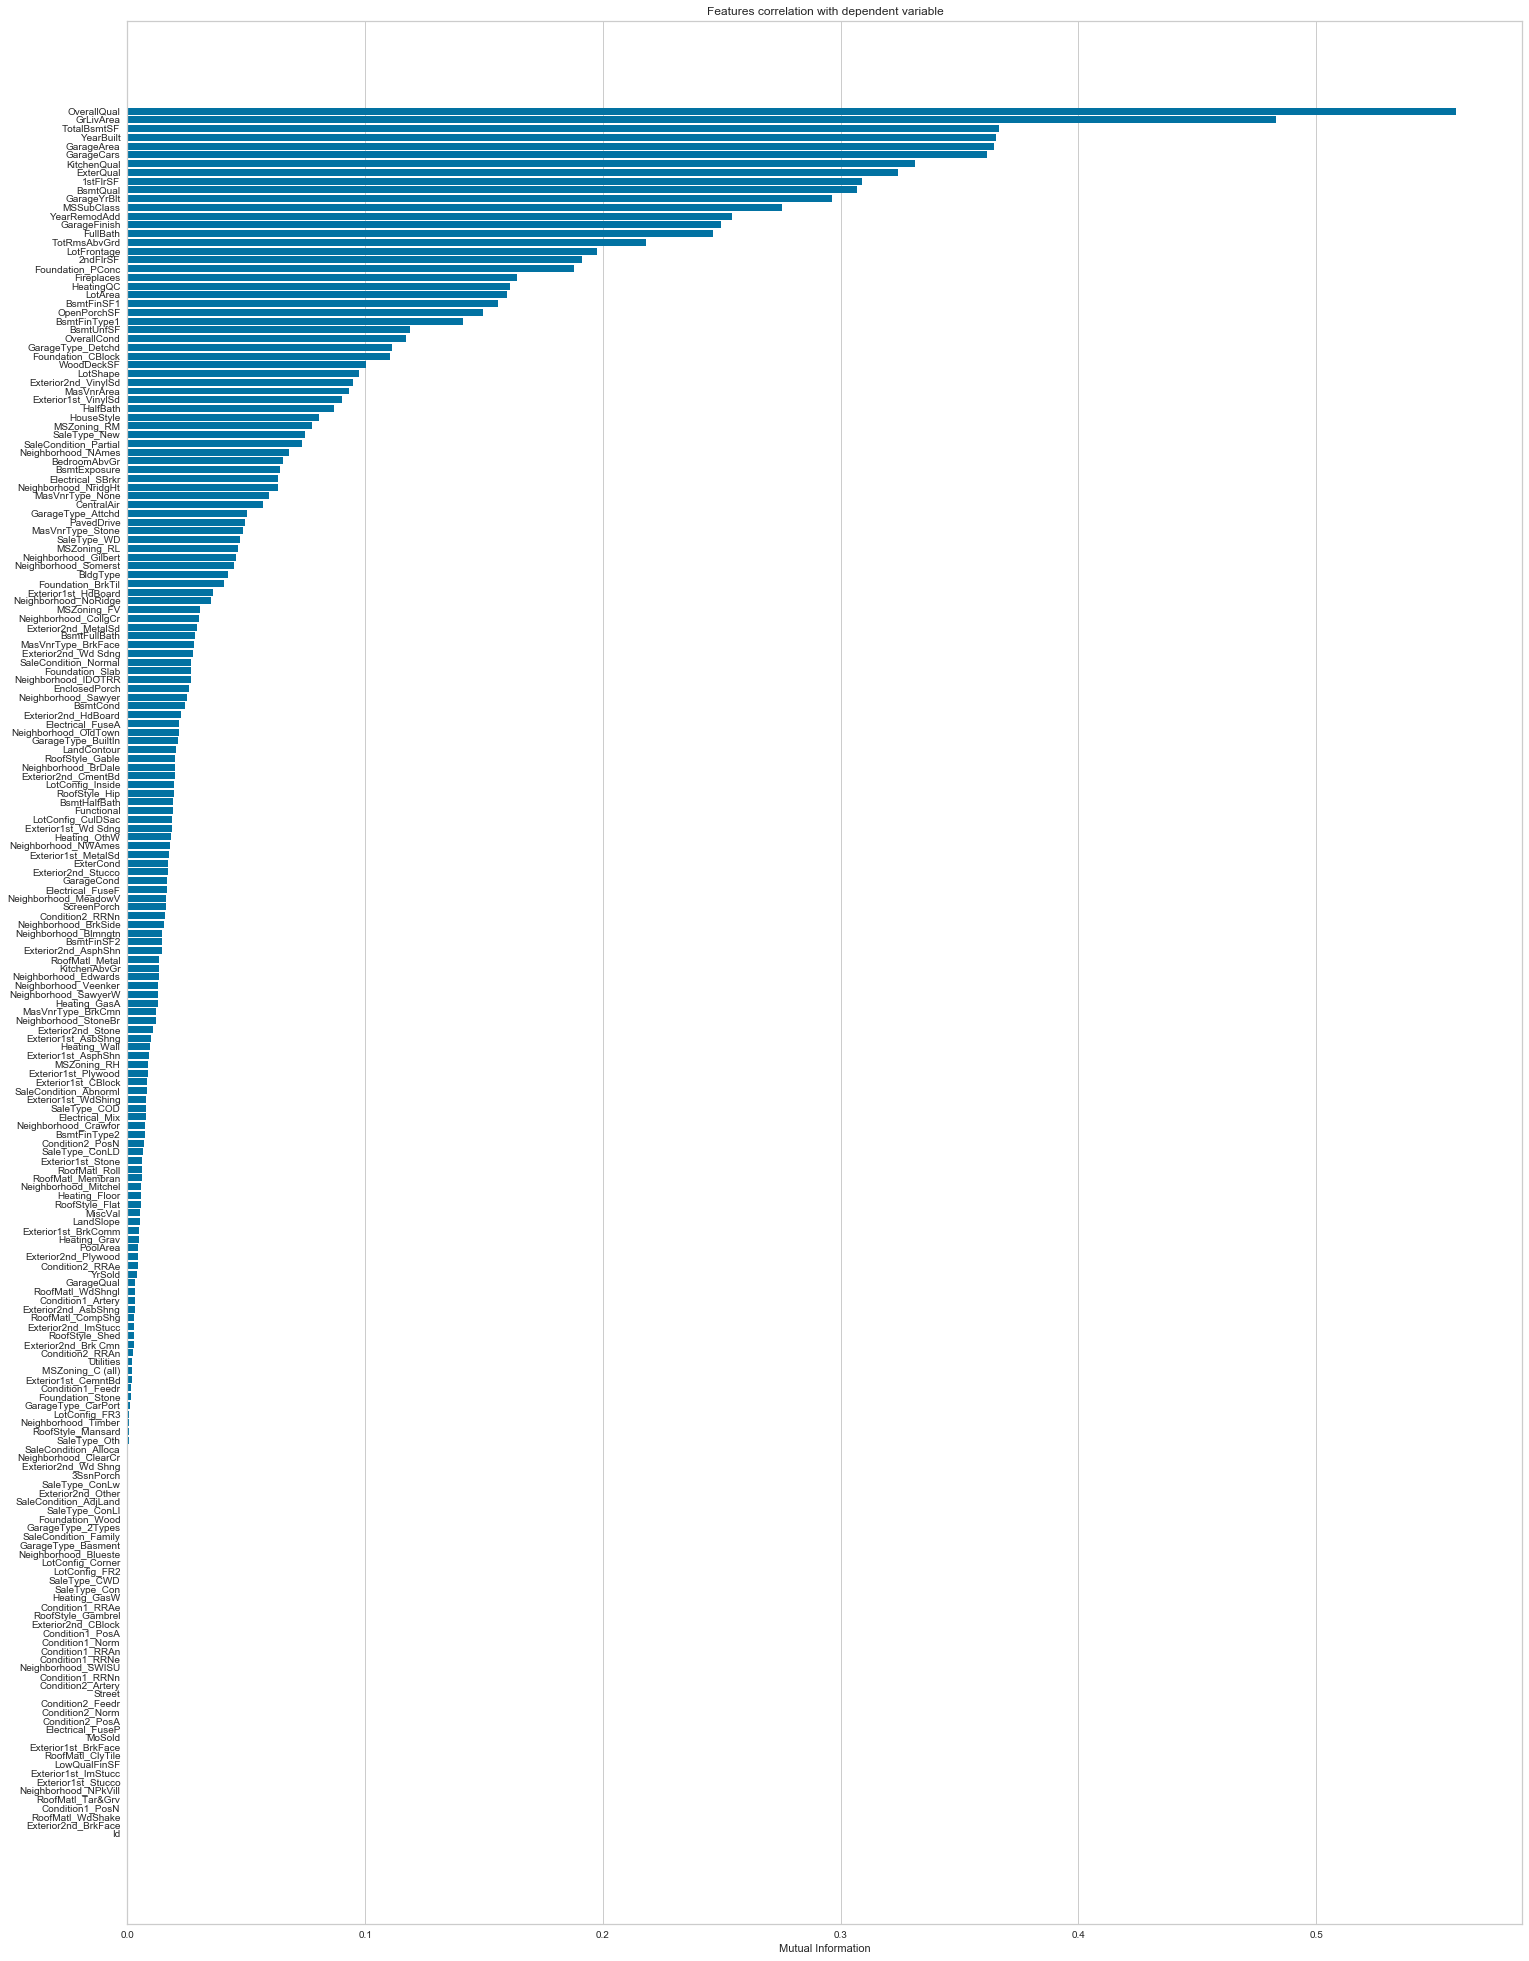

In [39]:
# Correlation as per Mutual Info Regression
plt.figure(figsize=(25,35))
viz = FeatureCorrelation(labels=features.columns, method='mutual_info-regression', sort=True)
viz.fit(features, target)
viz.poof()
plt.show()

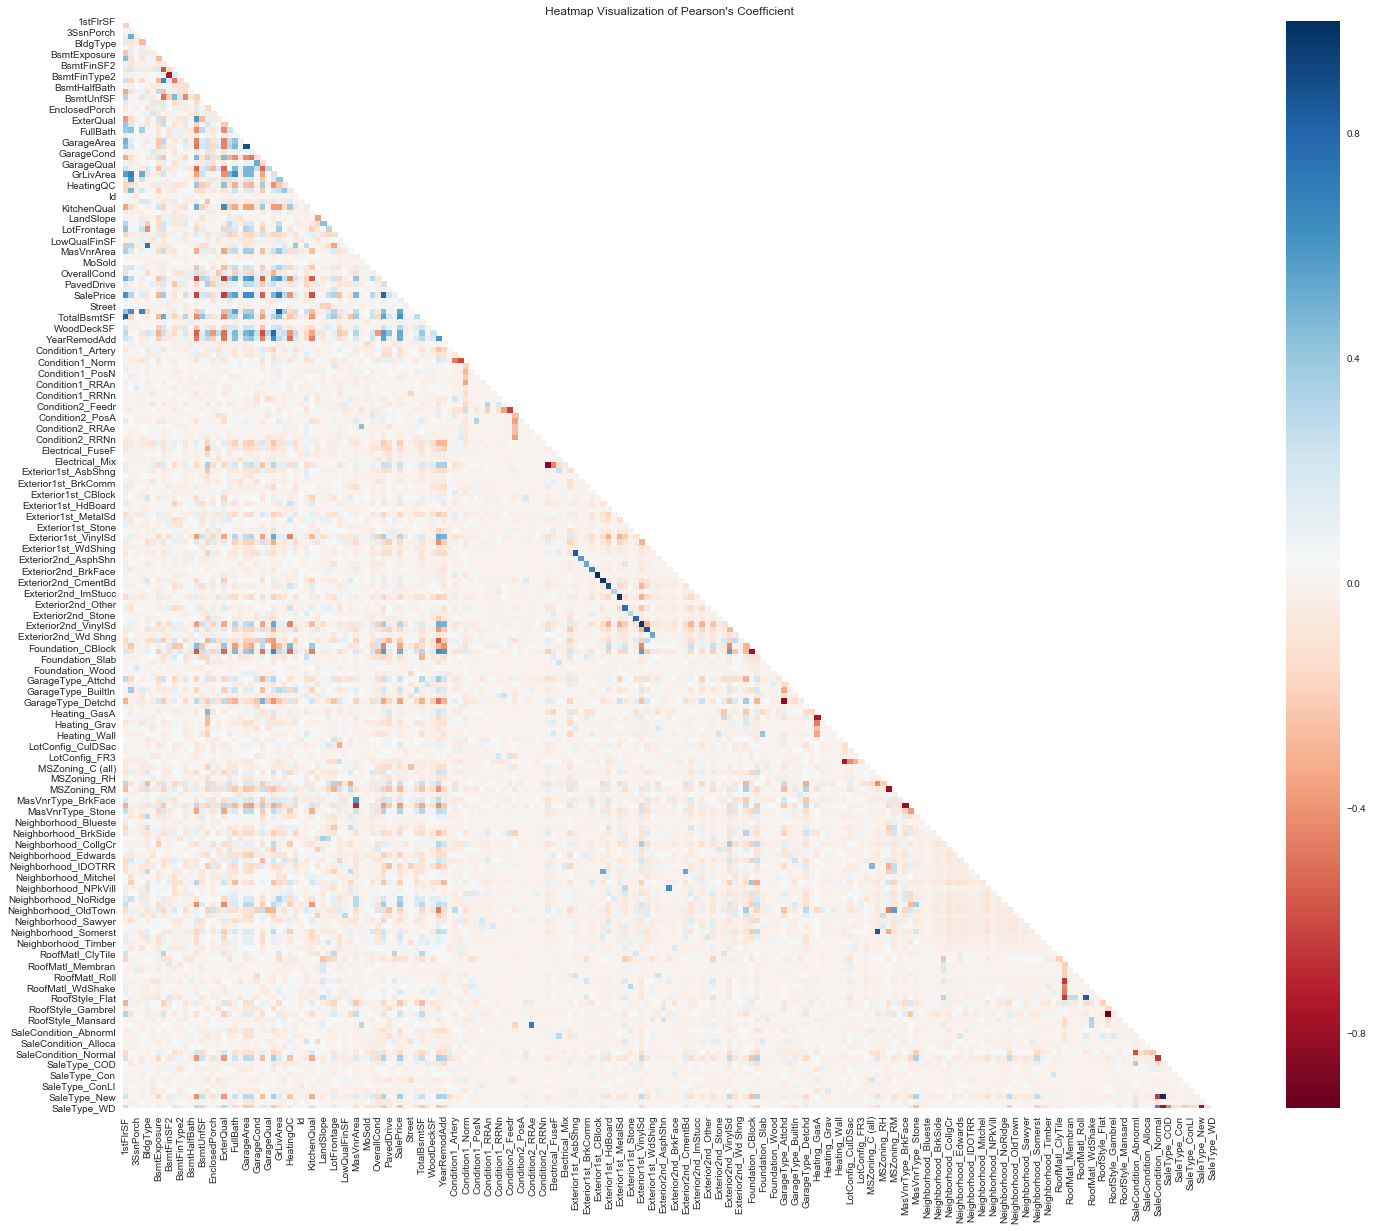

In [40]:
# Heatmap Visualization of Pearson's Coefficient
datacor = train_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(datacor, dtype=np.bool))

plt.figure(figsize=(25,20))
sns.heatmap(datacor, mask=mask, annot=False, square=True, cmap='RdBu')
plt.title("Heatmap Visualization of Pearson's Coefficient")
plt.show()

### define some helper functions, which would be used repeatedly

In [41]:
# create a function that would split data into training and testing
def split_data(features, target):
    
    from sklearn.model_selection import train_test_split
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
    
    return x_train, x_test, y_train, y_test

In [42]:
# helper function to evaluate different scores
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
def get_score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    rmsle = mean_squared_log_error(y_test, y_pred) 
    return (r2, mse, rmse, rmsle)

In [43]:
# function to Plot the Actual vs Predicted Sale Prices
def plot_data(y_test, y_pred):
    plt.figure(figsize=(18,12))
    plt.plot(y_test.values, label='Actual', c='r')
    plt.plot(y_pred, label='Predicted', c='b')
    plt.title('Actual vs Predicted Sale Price of the House')
    plt.ylabel('Sale Price')
    plt.legend()

# Bagging Regressor
Bootstrap Aggregate Regressor with DecisionTreeRegressor as Base Learner

use all the features, but some data points in training sample to train the base learner

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# num of predictors in ensemble is set to 500
# bootstrap = True configures BaggingRegressor to perform Bagging/ bootstrap aggregation
# max_samples=0.8, only 80% of the training data will be used in training each predictor
# oob_score=True, out-of-bag evaluation; 20% of unseen data by each predictor is used to evaluate the same
# n_jobs= -1, # of jobs to run in parallel; -1 means all processes will run in parallel

base_learner = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_learner, n_estimators=500, bootstrap=True,
                                 max_samples=0.8, oob_score=True, n_jobs=-1)

x_train, x_test, y_train, y_test = split_data(features, target)

bagging_model.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_sample

In [45]:
y_pred = bagging_model.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

R2 score of the model is 0.888
MSE score of the model is 798806797.384
RMSE score of the model is 798806797.384
RMSLE score of the model is 0.021


# Random Subspace
use different and random subsets of features but all data points to train the base learner

In [46]:
# train using 80% of input features but all data points

rndm_subspace = BaggingRegressor(DecisionTreeRegressor(), bootstrap=False, bootstrap_features=True, n_estimators=500,
                                 max_features=0.8, max_samples=1.0, n_jobs=-1)

x_train, x_test, y_train, y_test = split_data(features, target)

rndm_subspace.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=False, bootstrap_features=True, max_features=0.8,
                 max_sample

In [47]:
y_pred = rndm_subspace.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

R2 score of the model is 0.898
MSE score of the model is 724118423.481
RMSE score of the model is 724118423.481
RMSLE score of the model is 0.020


# Random Patches
use random subset of features as well as subset of data points to train base learner

In [48]:
rndm_patch = BaggingRegressor(DecisionTreeRegressor(), bootstrap=True, bootstrap_features=True, n_estimators=500,
                             max_samples=0.8, max_features=0.8, oob_score=True, n_jobs=-1)

x_train, x_test, y_train, y_test = split_data(features, target)

rndm_patch.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=True, max_features=0.8,
                 max_samples

In [49]:
y_pred = rndm_patch.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

R2 score of the model is 0.885
MSE score of the model is 819337257.235
RMSE score of the model is 819337257.235
RMSLE score of the model is 0.021


# Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

rndm_frst_model = RandomForestRegressor(n_estimators=500, n_jobs=-1)

x_train, x_test, y_train, y_test = split_data(features, target)

rndm_frst_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [51]:
y_pred = rndm_frst_model.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

R2 score of the model is 0.893
MSE score of the model is 761677303.775
RMSE score of the model is 761677303.775
RMSLE score of the model is 0.020


# Extra Trees
Extremely Randomized (Extra) Trees - adds extra randomness by splitting on random threshold

In [52]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree_model = ExtraTreesRegressor(n_estimators=500, n_jobs=-1)

x_train, x_test, y_train, y_test = split_data(features, target)

extra_tree_model.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [53]:
y_pred = extra_tree_model.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

R2 score of the model is 0.892
MSE score of the model is 772806832.873
RMSE score of the model is 772806832.873
RMSLE score of the model is 0.019


# Gradient Boosted Regressor

In [54]:
# baseline Gradient Boosted Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()

x_train, x_test, y_train, y_test = split_data(features, target)

gbr_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
y_pred = gbr_model.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

R2 score of the model is 0.915
MSE score of the model is 602673660.893
RMSE score of the model is 602673660.893
RMSLE score of the model is 0.017


# Grid Search for hyperparameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# warm_start = store and reuse previous fit values
# n_iter_no_change = used for early stopping, terminates the training process if validation score is not improving for this many iterations
grb = GradientBoostingRegressor(warm_start=True, n_iter_no_change=15)
x_train, x_test, y_train, y_test = split_data(features, target)

num_estimators = [100, 250, 500]
learn_rates = [0.05, 0.1]
depths = [3, 5, None]

# test different values of n_estimators to see which one would yield better results
params = {'n_estimators': num_estimators, 'max_depth': depths, 'learning_rate': learn_rates}

# cv = 5 -> 5-fold Cross Validation
grid_search = GridSearchCV(estimator=grb, param_grid=params, cv=5, return_train_score=True)
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
# get the best parameters
grid_search.best_params_

In [ ]:
# let's view each model/parameters in detail
# total_size = 3*2*3 = 18
for i in range(18):
    print('Parameters:', grid_search.cv_results_['params'][i])
    print('Mean Test Score:', grid_search.cv_results_['mean_test_score'][i])
    print('Rank', grid_search.cv_results_['rank_test_score'][i])

### Gradient Boosting Regressor with Hyperparameters as per Grid Search

In [ ]:
# Gradient Boosting Regressor with Hyperparameters as per Grid Search

hyper_param = grid_search.best_params_

gradient_reg = GradientBoostingRegressor(n_estimators=hyper_param['n_estimators'], max_depth=hyper_param['max_depth'],
                                         learning_rate=hyper_param['learning_rate'])

x_train, x_test, y_train, y_test = split_data(features, target)

gradient_reg.fit(x_train, y_train)

In [ ]:
y_pred = gradient_reg.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

In [ ]:
plot_data(y_test, y_pred)

# Stacking Models 
Stacking is training additional/blender model to combine predictions from individual learners

While using Stacking, we need to divide the original training data to three sets -> training set, hold out set, and the final test set

In [ ]:
# split into 3 sets - train, hold-out, test
# x_train = 70%data(0 to 0.7*len), x_hold = 20%data(0.7len to 0.9len), x_test = 10%data(0.9len to len)

x_train, x_hold, x_test = np.split(features, [int(.7*len(features)), int(.9*len(features))])
y_train, y_hold, y_test = np.split(target, [int(.7*len(target)), int(.9*len(target))])

print(features.shape, x_train.shape, x_hold.shape, x_test.shape)
print(target.shape, y_train.shape, y_hold.shape, y_test.shape)

### Instantiate Individual Regressors

In [ ]:
# instantiate individual regressors -> individual scores can be found above

# Random Forest Regressor
rndm_frst_model = RandomForestRegressor(n_estimators=500, n_jobs=-1)

# Extra Trees Regressor
extra_tree_model = ExtraTreesRegressor(n_estimators=500, n_jobs=-1)

# Gradient Boosting Regressor with hyperparameters as per GridSearch values
gradient_reg = GradientBoostingRegressor(n_estimators=hyper_param['n_estimators'], max_depth=hyper_param['max_depth'],
                                         learning_rate=hyper_param['learning_rate'])

# fit each model seperately on training data (70% data)
for model in (rndm_frst_model, extra_tree_model, gradient_reg):
    model.fit(x_train, y_train)

### Function to get predictions from each model

In [ ]:
def get_predictions(x, y):
    
    # create a new dataframe to store the result of each model
    result = pd.DataFrame()
    i = 1
    
    for model in (rndm_frst_model, extra_tree_model, gradient_reg):
        
        y_pred = model.predict(x)
        
        # print the RMSLE for each model
        print(f'Root Mean Squared Logarithmic Error = {mean_squared_log_error(y, y_pred):.3f}')
        
        # insert the index number, predictor number and prediction in the dataframe, which will be the outcome of this function
        result.insert(i-1, 'y_pred_'+str(i), y_pred)
        i += 1        
    
    return result

#### using the function defined above, get the predictions of individual models by passing in the hold-out set

In [ ]:
prediction_df = get_predictions(x_hold, y_hold)

#### predicted values from these models will act as input to the blender/meta-learner model

In [ ]:
# sample of predictions made by regressors
prediction_df.sample(5)

In [ ]:
# instantiate the blender model

blender_model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, bootstrap_features=True,
                                max_samples=0.8, max_features=0.8, oob_score=True, n_jobs=-1)
# GradientBoostingRegressor(n_estimators=5000, loss='huber', max_features='sqrt', max_depth=3, learning_rate=0.001)

# x and y values which will be used to train the blender model
x_blender = prediction_df
y_blender = y_hold

In [ ]:
# Training the Blender Model
blender_model.fit(x_blender, y_blender)

#### finally predict the output of the Stacking Model using Test Dataset
need to get predictions of x_test data from individual learners and then pass that for blender prediction

In [ ]:
# get prediction of x_test from individual models

individual_pred = get_predictions(x_test, y_test)

# finally the stacking model prediction
y_final = blender_model.predict(individual_pred)

In [ ]:
r2, mse, rmse, rmsle = get_score(y_test, y_final)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

not the kind of result I was expecting, stacking Random Forest, Gradient Boosting and Extra Trees with Bagging Regressor and Gradient Boosted Regressor as meta-learner did not produce better results. 
Let's try out the eXtreme Gradient Boosted Regressor 

# eXtreme Gradient Boosted Regressor (XGBRegressor)

In [ ]:
from xgboost import XGBRegressor

baseline_xg = XGBRegressor()

x_train, x_test, y_train, y_test = split_data(features, target)

baseline_xg.fit(x_train, y_train)

In [ ]:
y_pred = baseline_xg.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

In [ ]:
# eval_metric='rmsle' as rmsle has to be minimized

xg_model = XGBRegressor(n_estimators=5000, max_depth=3, learning_rate=0.01, eval_metric='rmsle',
                        colsample_bytree=0.5, alpha=0.5, reg_lambda=0.5, n_jobs=-1, gamma=0.5,
                        subsample=0.5)

x_train, x_test, y_train, y_test = split_data(features, target)

xg_model.fit(x_train, y_train)

In [ ]:
y_pred = xg_model.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.3f}')

In [ ]:
plot_data(y_test, y_pred)

### Using XGBR along with tiny percentage of other models

In [ ]:
# Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=500, n_jobs=-1, oob_score=True)

# Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=500, n_jobs=-1)

# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(n_estimators=5000, loss='huber', learning_rate=0.01, max_depth=3)

# eXtreme Gradient Boosted Regressor
extreme_gradient_boosted = XGBRegressor(n_estimators=5000, max_depth=3, learning_rate=0.01, eval_metric='rmsle',
                        colsample_bytree=0.5, alpha=0.5, reg_lambda=0.5, n_jobs=-1, gamma=0.5,
                        subsample=0.5)

In [ ]:
x_train, x_test, y_train, y_test = split_data(features, target)

for model in (random_forest, extra_trees, gradient_boosted, extreme_gradient_boosted):
    model.fit(x_train, y_train)
    print(f'{model.__class__.__name__} has training score of {model.score(x_train, y_train):.3f}')

In [ ]:
y_pred_rndm_frst = random_forest.predict(x_test)
y_pred_extra_trees = extra_trees.predict(x_test)
y_pred_gbr = gradient_boosted.predict(x_test)
y_pred_xgbr = extreme_gradient_boosted.predict(x_test)

In [ ]:
y_final = (0.01*y_pred_rndm_frst + 0.06*y_pred_extra_trees + 0.03*y_pred_gbr + 0.9*y_pred_xgbr)

In [ ]:
r2, mse, rmse, rmsle = get_score(y_test, y_final)

print(f'R2 score of the model is {r2:.3f}')
print(f'MSE score of the model is {mse:.3f}')
print(f'RMSE score of the model is {rmse:.3f}')
print(f'RMSLE score of the model is {rmsle:.5f}')

In [ ]:
plot_data(y_test, y_final)

### making the final prediction

In [ ]:
pred_rndm_frst = random_forest.predict(test_df)
pred_extra_trees = extra_trees.predict(test_df)
pred_gbr = gradient_boosted.predict(test_df)
pred_xgbr = extreme_gradient_boosted.predict(test_df)

In [ ]:
pred = (0.01*pred_rndm_frst + 0.06*pred_extra_trees + 0.03*pred_gbr + 0.9*pred_xgbr)

In [ ]:
sub_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': pred})
sub_df.to_csv('submit2.csv', index=False)

In [ ]:
sub_df.sample(5)

In [ ]:
y_final